In [205]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb 
%matplotlib inline

## 01-Cleaning the Data

In [206]:
df = pd.read_csv('data.csv')

In [207]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [208]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [209]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [210]:
str_columns = list(df.dtypes[df.dtypes == 'object'].index)
str_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [211]:
for col in str_columns: 
    df[col] = df[col].str.replace(' ', '_').str.lower()

## 02-Exploratory Analysis

In [212]:
for col in df.columns: 
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

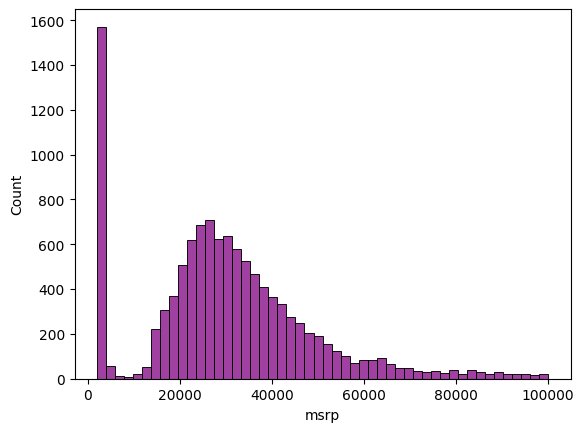

In [213]:
sb.histplot( df.msrp[df.msrp <= 100000], bins=50, color='purple')

In [214]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 03-Setting Validation Framework

In [215]:
np.random.seed(1)

n = len(df)
n_train = int(.6 * n)
n_val = int(.2*n)
n_test = n - n_train - n_val

In [216]:
#reshuffle the whole array once

In [217]:
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([ 4257, 11151,  5262, ...,   905,  5192,   235])

In [218]:
df_shuffled = df.iloc[idx]

In [219]:
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,lotus,evora_400,2017,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,39,21,613,91900
1,aston_martin,v8_vantage,2014,premium_unleaded_(required),420.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,136900
2,hyundai,genesis,2015,regular_unleaded,311.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,29,18,1439,38000
3,suzuki,samurai,1993,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,convertible_suv,26,24,481,2000
4,mitsubishi,outlander,2015,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,29,24,436,26195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,audi,q5,2016,premium_unleaded_(required),272.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,26,18,3105,53500
11910,toyota,tundra,2015,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,17,13,2031,47975
11911,saab,900,1997,regular_unleaded,150.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,26,18,376,2000
11912,pontiac,g6,2009,regular_unleaded,164.0,4.0,automatic,front_wheel_drive,2.0,NaN,midsize,coupe,33,22,210,22220


In [220]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

In [221]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

In [222]:
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [223]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 04-Preparing the X

In [224]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [225]:
base = ['engine_hp', 'engine_cylinders','popularity']

In [226]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [227]:
prepare_X(df_test)

array([[ 241.,    4.,  454.],
       [ 185.,    4., 2202.],
       [ 210.,    4.,  873.],
       ...,
       [ 150.,    4.,  376.],
       [ 164.,    4.,  210.],
       [ 255.,    6., 1013.]])

### A bit of feature engineering 

In [228]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    #feature engineering 
    df['age'] = df.year.max() - df.year
    df['cmb_mpg'] = (df.highway_mpg + df.city_mpg)/2
    features += ['age', 'cmb_mpg']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [229]:
prepare_X(df_test)

array([[2.410e+02, 4.000e+00, 4.540e+02, 0.000e+00, 2.700e+01],
       [1.850e+02, 4.000e+00, 2.202e+03, 2.000e+00, 3.050e+01],
       [2.100e+02, 4.000e+00, 8.730e+02, 3.000e+00, 2.800e+01],
       ...,
       [1.500e+02, 4.000e+00, 3.760e+02, 2.000e+01, 2.200e+01],
       [1.640e+02, 4.000e+00, 2.100e+02, 8.000e+00, 2.750e+01],
       [2.550e+02, 6.000e+00, 1.013e+03, 1.400e+01, 2.050e+01]])

### Adding Cateogrical Values

In [230]:
columns = list(df.dtypes[df.dtypes=='object'].index)

In [231]:
columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [232]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [233]:
cateogries ={}
for col in columns: 
    cateogries[col] = list(df[col].value_counts().head().index)
    
cateogries['number_of_doors'] = [2,3,4]

cateogries

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'number_of_doors': [2, 3, 4]}

In [234]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    #feature engineering 
    df['age'] = df.year.max() - df.year
    df['cmb_mpg'] = (df.highway_mpg + df.city_mpg)/2
    features += ['age', 'cmb_mpg']
    
    #cateogrical values 
    for c,values in cateogries.items(): 
        for v in values: 
            df[f"{c}_{v}"] = (df[c] == v).astype(int)
            features.append(f"{c}_{v}")
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [235]:
prepare_X(df_train)

array([[4.000e+02, 6.000e+00, 6.130e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.200e+02, 8.000e+00, 2.590e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.110e+02, 6.000e+00, 1.439e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.810e+02, 6.000e+00, 1.385e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.150e+02, 6.000e+00, 3.916e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.600e+02, 4.000e+00, 8.190e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

## Linear Regression

In [240]:
def train_linear_regression(X, y, r=0.001): # using regularisation
    col = np.ones(X.shape[0])
    X = np.column_stack([col, X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])*r
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return (w[:1], w[1:])

In [241]:
def rmse(y_pred, y):
    error = y_pred- y 
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [242]:
#train the model 
X = prepare_X(df_train)
w0, w = train_linear_regression(X, y_train)

#test it on df_val
X = prepare_X(df_val)
y_pred = w0 + X.dot(w)

In [243]:
rmse(y_pred, y_val)

0.4613786013539689

## Full train the model 

In [245]:
df_full_train = pd.concat([df_train, df_val])
y_full = np.concatenate([y_train, y_val])

In [246]:
#train the model 
X = prepare_X(df_full_train)
w0, w = train_linear_regression(X, y_full)

#test it on df_test
X = prepare_X(df_test)
y_pred = w0 + X.dot(w)

In [247]:
rmse(y_pred, y_test)

0.460741706562873

## Get prediction for some input from user say 

In [268]:
car = df_test.iloc[23].to_dict()

In [270]:
car 

{'make': 'subaru',
 'model': 'outback',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 175.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 33,
 'city_mpg': 25,
 'popularity': 640}

In [271]:
df_small = pd.DataFrame([car])

In [272]:
X = prepare_X(df_small)

y_pred = w0 + X.dot(w)

y_pred = y_pred[0]
np.expm1(y_pred).round(2)

29712.79

In [274]:
np.expm1(y_test[23]).round(2)

27395.0